In [ ]:
inits

In [80]:
from radd import CORE, models, fit, vis, build
data=prodf_store.prodata
inits=vtheta
data = redf_store.redata
inits = rebsl_boot_popt
inits = rebsl_ipa_popt
inits['xb']=.01

## xirace

In [82]:
data = redf_store.redata
inits = rebsl_ipa_popt
inits['xb']=.01
m=build.Model(data=data, kind='xirace', inits=inits)

m.optimize()
m.fitinfo


      Model is prepared to fit xirace model (w/ hyp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of Cond (bsl, pnl)

      It'll probably work this time 


## xradd

In [85]:
data = redf_store.redata
inits = rebsl_boot_popt
inits['xb']=.01
m=build.Model(data=data, kind='xradd', inits=inits)

m.optimize()
m.fitinfo

{'AIC': -217.1906954276082,
 'BIC': -214.25922362200876,
 'CNVRG': True,
 'a': 0.23612593863754697,
 'chi': 0.02986667853026934,
 'nfev': 255,
 'rchi': 0.00099555595100897791,
 'ssv': 1.1409373097403475,
 'tr': 0.33645136938577203,
 'v_bsl': 1.0719179654461353,
 'v_pnl': 1.0038770866710787,
 'xb': 0.010110434143225679}

## xpro (exp)

In [116]:
fit_id = ''.join(["SUBJECT ",  str(m.observed.index[0])])

In [117]:
fit_id

'SUBJECT 28'

In [98]:
from copy import deepcopy

In [100]:
idict = dict(deepcopy({'v': np.array([1.26285721,1.43037044,1.57046678, 1.70085341,1.86816270,1.99732021]), 'a':0.4835983, 'xb':    1.460462 , 'tr':    0.3375415}))


In [102]:
m.simulate()

array([ 0.97659064,  0.7785114 ,  0.469988  ,  0.30192077,  0.03481393,
        0.01560624,  0.48784179,  0.50484179,  0.51784179,  0.53034179,
        0.54734179,  0.51684179,  0.53234179,  0.54134179,  0.54934179,
        0.55634179])

In [103]:
yhat = m.simulate(idict)

In [107]:
m.inits

{'a': 0.4748, 'tr': 0.2725, 'v': 1.6961, 'xb': 2}

In [113]:
data=prodf_store.prodata
#inits=vtheta
#inits['v'] = np.mean(vopt.values())
m=build.Model(data=data, kind='xpro', dynamic='exp')


      Model is prepared to fit xpro model (w/ exp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      Check your zoomfile before optimizing. It should be in your computer 



In [115]:
m.optimize()
m.fitinfo

Optimization terminated successfully.
         Current function value: 0.000029
         Iterations: 234
         Function evaluations: 602
Optimization terminated successfully.
         Current function value: 0.002126
         Iterations: 424
         Function evaluations: 1139


{'AIC': -120.48018512207173,
 'BIC': -115.84465278863304,
 'CNVRG': True,
 'a': 0.47943252729314417,
 'chi': 0.0025353426659346732,
 'nfev': 1139,
 'rchi': 0.00025353426659346733,
 'tr': 0.2666060945560722,
 'v_0': 1.3156150095330776,
 'v_100': 1.9553287059712632,
 'v_20': 1.4580128770265011,
 'v_40': 1.5873163071499887,
 'v_60': 1.699317001227286,
 'v_80': 1.8774180469445783,
 'xb': 0.094439767823765702}

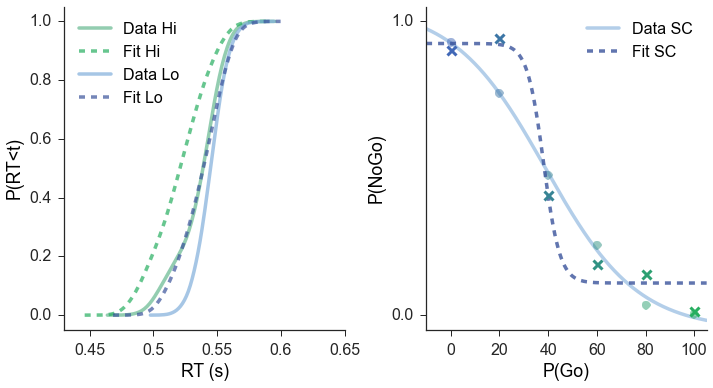

In [106]:
yhat = m.simulate() 
vis.plot_fits(m.avg_y, yhat, kind='pro')

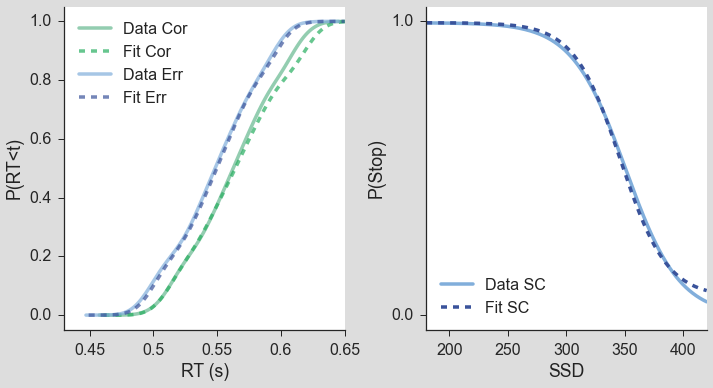

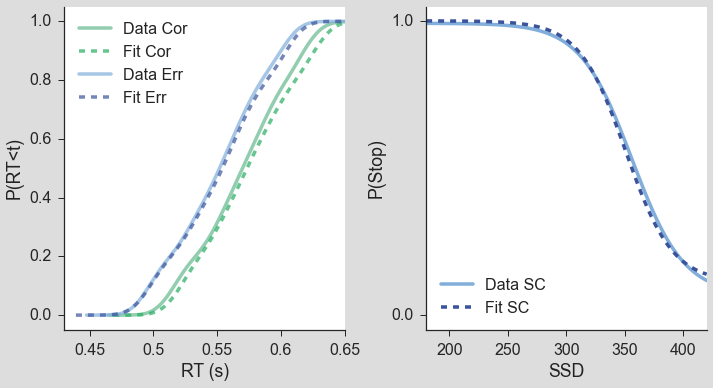

In [51]:
yhat = m.fits.reshape(2, 16)
for i in range(m.ncond):
      vis.plot_fits(m.avg_y[i], yhat[i], kind='radd')

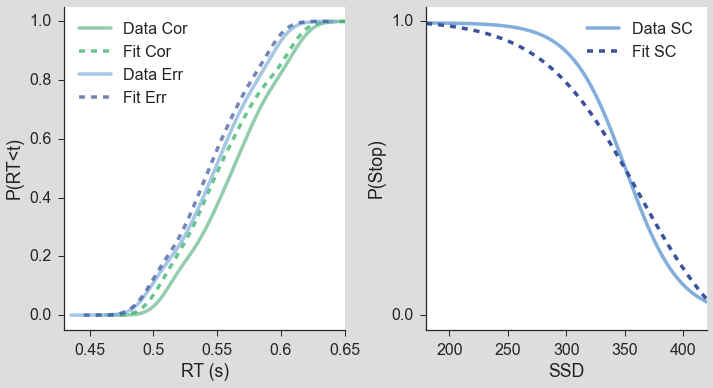

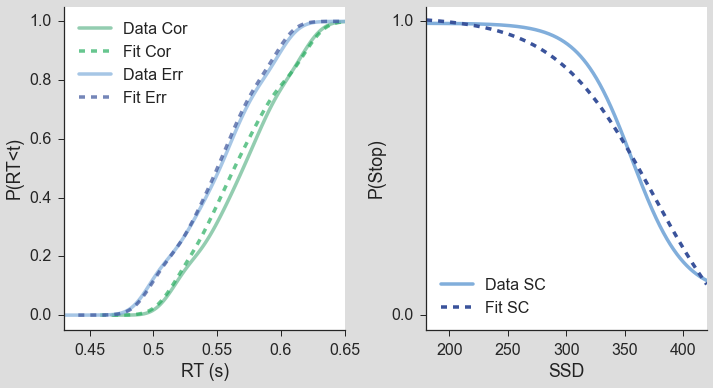

In [86]:
yhat = m.fits.reshape(2, 16)
for i in range(m.ncond):
      vis.plot_fits(m.avg_y[i], yhat[i], kind='radd')